# Portfolio Management : Optimization

## Preliminaries

## Convex Optimization

Consider a convex set $C \subseteq \mathbb{R}^n $ and a convex function $f:C \rightarrow \mathbb{R}$. Convex optimization is the problem of finding some $x^* \in C$ attaining $\inf \{ f(x) : x \in C\}$

$\begin{align}
\begin{split}
\min_x f(x) \\
g_i(x) \leq 0 \\
h_j(x) = 0 \\
\end{split}
\end{align}$

## Properties of convex optimization

- Every local minimum is a global minimum
- The optimal set is convex
- If the problem is strictly convex the global minimum is unique

## Graphical Example

$\begin{align}
\begin{split}
\min_x x^2 \\
-x^2 + 4 \leq 0 \\
x \geq 0 \\
\end{split}
\end{align}$

In [8]:
from matplotlib import pyplot as plt 
import numpy as np

x = np.linspace(-5, 5, 20)
f = lambda xx : xx**2
fx = f(x) 

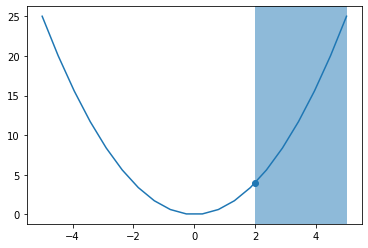

In [11]:
plt.plot(x, fx)
plt.axvspan(2, 5, alpha=0.5)
plt.scatter(2,4)

## Analytical Example

$\mathcal{L}(x; \lambda) = x^2 + \lambda_1 (-x^2+4) +\lambda_2 (-x)$

First order condition $\frac{\partial \mathcal{L}}{\partial x} = 2x-2\lambda_1 x - \lambda_2 = 0$ 

Complementary slackness $\lambda_1 (-x^2 + 4)=0$ and $\lambda_2 x = 0$

Primal Feasibility $-x^2+4 \leq 0$ and $-x \leq 0$

## Solution:

- From the second complementary slackness we know that $\lambda_2 = 0$ or $x=0$ or both
- $x = 0$ is not feasible, so $\lambda_2 = 0$
- $\lambda_2 = 0$ implies $x(1-\lambda_1)=0$
- $x(1-\lambda_1)=0$ implies $x=0$ or $\lambda_1=1$ or both
- Since $x=0$ is not feasible, $\lambda_1 = 1$
- Replacing in the first complementary slackness condition, $x^2 = 4 \rightarrow x^* =2$ 


## Python Solution: SciPy


In [17]:
!pip install scipy
from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint

In [31]:
g = NonlinearConstraint(fun = lambda xx : -xx**2 + 4, lb =[-np.inf], ub=[0.0])
solution = minimize(f, x0 = [5], bounds = [(0, np.inf)], constraints = [g])

solution.x

array([2.])

## High Dimensional optimization

$
\begin{align}
\begin{split}
\min_{x,y} x^2 + y^2 \\
x+y \geq 10
\end{split}
\end{align}
$

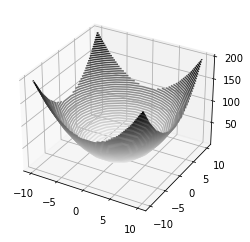

In [100]:
# Objective Function 
def f(xx,yy):
    return xx**2 + yy**2

x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.contour3D(X, Y, Z, 50, cmap='binary')



In [101]:
# Domain 
# Create constraints in 2 dimensions as c(x) = y
def c(xx):
    return 10-xx



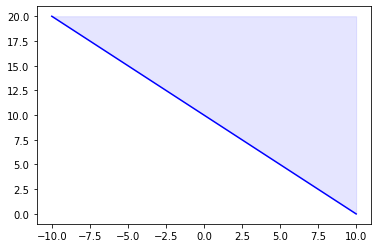

In [104]:
fig, ax = plt.subplots()
ax.plot(x, c(x), color='blue', alpha=1.00)
ax.fill_between(x, c(x), 20, color='blue', alpha=.1)
plt.show()

## All together

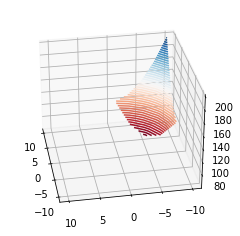

In [106]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
Z[Y >= 1 - c(X)] = np.nan
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.contour3D(X, Y, Z, 50, cmap=plt.cm.RdBu)
ax.view_init(elev=30, azim=-190)
plt.show()

## Analytical Solution (Over all $x+y \geq 10$)

$\mathcal{L}(x,y; \lambda, \mu_1, \mu_2) = x^2 + y^2 +\lambda(10-x-y)$



First order conditions

$ \begin{align}
\begin{split}
2x -\lambda  = 0 \\
2y -\lambda  = 0
\end{split}
\end{align}
$

Complementary Slackness

$  
\begin{align}
\begin{split}
\lambda (10-x-y) = 0 \\
\end{split}
\end{align}
$

Since the function is strictly convex, $x+y=10$


$10-\frac{\lambda}{2}-\frac{\lambda}{2} = 0 \rightarrow \lambda=10$

Replacing we get $x=y=5$ which satisfy the non negativity constraint

## Python Implementation

In [117]:
g = NonlinearConstraint(fun = lambda xy : 10-xy[0]-xy[1], lb =[-np.inf], ub=[0.0])
f = lambda xy : xy[0]**2 + xy[1]**2
solution = minimize(f, x0 = [10,10], bounds = [(0, np.inf), (0, np.inf)], constraints = [g])
solution

     fun: 50.000000000017515
     jac: array([10., 10.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([5., 5.])

## Non convex optimization

In some applications, optimization problems do not behave "nicely" and standard optimization solvers might have a hard time finding the solution. 

$\min_{x_1, x_2} 0.2+x_1^2 + x_2^2 - 0.1*cos(6\pi x_1) - 0.1cos(6 \pi x_2)$

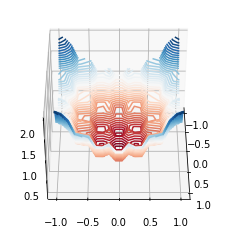

In [121]:
def obj(x1,x2):
    return 0.2+x1**2+x2**2-0.1*np.cos(6*np.pi*x1)-0.1*np.cos(6*np.pi*x2)

x1 = np.linspace(-1,1,20)
x2 = np.linspace(-1,1,20)

X1, X2 = np.meshgrid(x1, x2)
Y = obj(X1,X2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Y, 50, cmap=plt.cm.RdBu)
ax.view_init(elev=40, azim=0)
plt.show()

No **exact** methods exist to solve non convex optimization problem, but **heuristic** algorithms help us get close enough

## Simplest heuristic: Greedy Search

- Step 0, start from point $x=x_0$, set $k=0$, and $k_{max}$ as the maximum number of iterations
- Step 1, given some distance $\epsilon>0$ in any direction from $x$ find a neighbor $x'$
- Step 2, if $f(x')<f(x)$ and $k<k_{max}$ update $x=x'$, go to Step 1 and set $k=k+1$, otherwise return $x$


In [159]:
ns = neighbors([1,1], 0.01)
fps = np.array([f(xp) for xp in ns])


2

In [196]:
from random import randint
from random import random
def neighbors(x, epsilon):
    ns = []
    for sign in [1, -1]:
        for c in range(len(x)):
            temp = x.copy()
            #print(temp[c]+sign*epsilon)
            temp[c] = temp[c]+sign*epsilon
            
            ns.append(temp)
    return ns

def greedy_search(f, x0, k_max=1000, epsilon=0.1):
    x = x0
    history = []
    obj_fun = []
    it      = []
    for k in range(k_max):
        history.append(x)
        current_f = f(x)
        obj_fun.append(current_f)
        it.append(k)
        # Find a neighbor in a neighborhood of radius epsilon
        ns = neighbors(x, epsilon)
        fps = np.array([f(xp) for xp in ns])

        fp = np.min(fps)
        i_xp = np.argmin(fps)

        if fp < current_f:
            x = ns[i_xp]
        else:
            break

    return x, np.array(it), np.array(obj_fun), history

f = lambda x : x[0]**2+x[1]**2

x0 = [1,1]
x, it, obj_fun, history = greedy_search(f, x0)


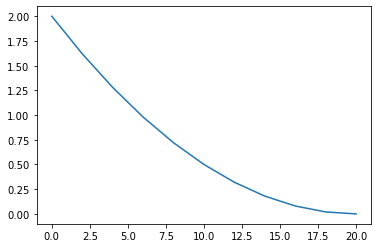

In [197]:
plt.plot(it, obj_fun)

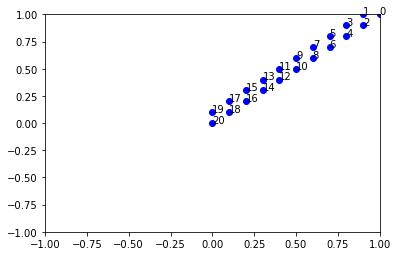

In [198]:
# History in 2d space
fig, ax = plt.subplots()
for i in range(len(history)):
    ax.scatter(history[i][0], history[i][1], color='blue')
    ax.annotate(i, (history[i][0], history[i][1]))
plt.xlim([-1, 1])
plt.ylim([-1,1])
plt.show()

## **Deterministic local search algorithms dont escape local minima**

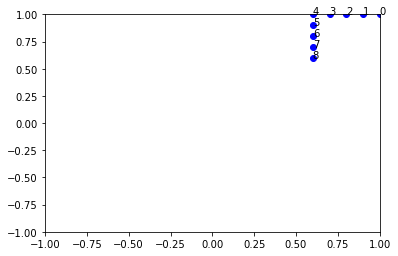

In [195]:
f = lambda x : 0.2 + x[0]**2+x[1]**2 - 0.1*np.cos(6*np.pi*x[0])-0.1*np.cos(6*np.pi*x[1])
x0 = [1,1]
x, it, obj_fun, history = greedy_search(f, x0)
fig, ax = plt.subplots()
for i in range(len(history)):
    ax.scatter(history[i][0], history[i][1], color='blue')
    ax.annotate(i, (history[i][0], history[i][1]))

plt.xlim([-1, 1])
plt.ylim([-1,1])
plt.show()

Minimum of function is 9.391967764005305e-06


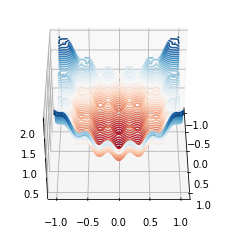

In [208]:
x1 = np.linspace(-1,1,2000)
x2 = np.linspace(-1,1,2000)

X1, X2 = np.meshgrid(x1, x2)
Y = obj(X1,X2)
print(f"Minimum of function is {np.min(Y)}")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Y, 50, cmap=plt.cm.RdBu)
ax.view_init(elev=40, azim=0)
plt.show()

## Escape local minima - accept worse solutions with certain probability

In [209]:
def greedy_search_random(f, x0, p, k_max=1000, epsilon=0.1):
    x = x0
    history = []
    obj_fun = []
    it      = []
    for k in range(k_max):
        history.append(x)
        current_f = f(x)
        obj_fun.append(current_f)
        it.append(k)
        # Find a neighbor in a neighborhood of radius epsilon
        ns = neighbors(x, epsilon)
        fps = np.array([f(xp) for xp in ns])

        fp = np.min(fps)
        i_xp = np.argmin(fps)

        # With probability p, accept a random point in the neighborhood

        if (random() > p) and (fp < current_f):
            x = ns[i_xp]
        else:
            x = ns[randint(0, len(ns)-1)]

    return x, np.array(it), np.array(obj_fun), history

Minimum value explored 0.10909830056250519


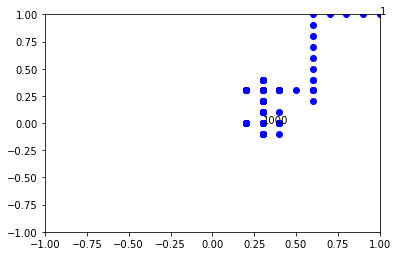

In [217]:
f = lambda x : 0.2 + x[0]**2+x[1]**2 - 0.1*np.cos(6*np.pi*x[0])-0.1*np.cos(6*np.pi*x[1])
x0 = [1,1]
x, it, obj_fun, history = greedy_search_random(f, x0, 0.01)
print(f"Minimum value explored {np.min(obj_fun)}")
fig, ax = plt.subplots()
for i in range(len(history)):
    ax.scatter(history[i][0], history[i][1], color='blue')
    #ax.annotate(i, (history[i][0], history[i][1]))
ax.annotate(1, (history[0][0], history[0][1]))
ax.annotate(len(history), (history[-1][0], history[-1][1]))
plt.xlim([-1, 1])
plt.ylim([-1,1])
plt.show()

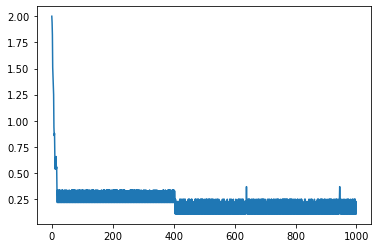

In [218]:
plt.plot(it, obj_fun)

## Structured algorithm for non convex non linear problems, **Dual Simulated Annealing**

In [226]:
from scipy.optimize import dual_annealing 
f = lambda x : 0.2 + x[0]**2+x[1]**2 - 0.1*np.cos(6*np.pi*x[0])-0.1*np.cos(6*np.pi*x[1])
res = dual_annealing(f, [(-1, 1), (-1, 1)], maxiter=1000)
res

     fun: 1.429412144204889e-15
 message: ['Maximum number of iteration reached']
    nfev: 4022
    nhev: 0
     nit: 1000
    njev: 7
  status: 0
 success: True
       x: array([-7.24172448e-09, -4.79268246e-09])

# **Financial Example - Portfolio Management**

In [245]:
# Optimal allocation between 10 stocks
url = r'http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/30_Industry_Portfolios_CSV.zip'

import requests, zipfile, io
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [262]:
f = open('30_Industry_Portfolios.CSV', 'r')
lines = f.readlines()
f.close()
lines = lines[11:1154]


f = open('industry_portfolios.csv', 'w')
for line in lines:
    f.write(line)
f.close()


In [272]:
import pandas as pd
df = pd.read_csv('industry_portfolios.csv')
df = df.rename(columns = {'Unnamed: 0' : 'Date'})
for column in df.columns[1:]:
    df[column] = df[column]/100

df.head()

R = df.iloc[:, 1:].values


In [278]:
# Expected returns and covariance
mu = np.mean(R, axis = 0)
Sigma = np.cov(np.transpose(R)) 
Sigma.shape

(30, 30)

## Given a vector of expected returns $\mu$ and a variance covariance matrix $\Sigma$ maximize
$
\begin{align}
\begin{split}
\min_{\theta} \mu'\theta - \frac{\gamma}{2} \theta' \Sigma \theta \\
\theta' \mathbb{1} = 1
\end{split}
\end{align}
$

## Numerical solution

In [279]:
def mean_variance(theta, gamma = 2.0):
    return theta.dot(mu)-0.5*gamma* theta.dot(Sigma.dot(theta))

theta = np.ones(30)/30
mean_variance(theta)


0.007172105215172082

In [289]:
# Convex optimization

g = NonlinearConstraint(fun = lambda theta: theta.dot(np.ones(len(theta))), lb =[1.0], ub=[1.0])

solution = minimize(lambda theta : -mean_variance(theta), 
                                    x0 = np.ones(len(mu))/len(mu) , 
                                bounds = [(-np.inf, np.inf) for i in range(len(mu))], 
                           constraints = [g])
solution

     fun: -0.014108610095206907
     jac: array([-0.00625803, -0.00627986, -0.00639145, -0.00637735, -0.00650248,
       -0.00639601, -0.0063082 , -0.00651626, -0.00654572, -0.00633799,
       -0.00625299, -0.00650894, -0.00664304, -0.00664448, -0.00649588,
       -0.00639442, -0.00640019, -0.00637965, -0.00638613, -0.006526  ,
       -0.00645844, -0.00652896, -0.006645  , -0.00653575, -0.00639252,
       -0.0064494 , -0.00652687, -0.00627006, -0.0065813 , -0.00654442])
 message: 'Optimization terminated successfully'
    nfev: 589
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([-0.08436915,  0.60144708,  0.71310531,  0.14734969, -0.35441079,
       -0.47186535,  0.15037345,  0.40237502,  0.14650609,  0.08078182,
       -0.48644417, -0.58242327,  0.20550299,  0.39469029,  0.42044376,
        0.43141542,  0.09359398,  0.05348216,  0.22776347, -0.17089179,
       -0.22483199,  0.31736814,  0.41329701,  0.03093162, -0.29537658,
       -0.62219791,  0.25330613,  0.239

In [296]:
# No short sales
solution = minimize(lambda theta : -mean_variance(theta), 
                                    x0 = np.ones(len(mu))/len(mu) , 
                                bounds = [(0.0, np.inf) for i in range(len(mu))], 
                           constraints = [g])

for i in range(1, len(mu)):
    w = round(solution.x[i]*100,2)
    if abs(w) > 0.1:
        print(f"{df.columns[i]} => {w} %")



Food  => 16.82 %
Beer  => 31.78 %
Clths => 14.17 %
Telcm => 25.68 %
Servs => 11.53 %


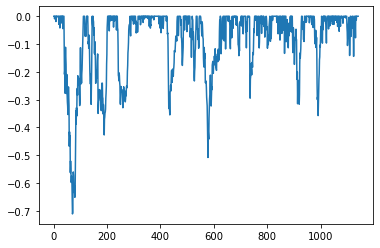

In [310]:
# Backtest
theta = solution.x
rets = np.array([R[i, :].dot(theta) for i in range(R.shape[0])])
cum_rets = np.cumprod(1+rets)
hwm = np.array([np.max(cum_rets[:(i+1)]) for i in range(len(rets))])
dd  = (cum_rets-hwm)/hwm
plt.plot(dd)


## Find a strategy that based on the backtest minimizes the maximum drawdown

In [313]:
def mdd(theta):
    rets = np.array([R[i, :].dot(theta) for i in range(R.shape[0])])
    cum_rets = np.cumprod(1+rets)
    hwm = np.array([np.max(cum_rets[:(i+1)]) for i in range(len(rets))])
    dd  = (cum_rets-hwm)/hwm
    return np.max(-dd)
    


In [315]:

res = dual_annealing(mdd, [(-1, 1) for n in range(len(mu))], maxiter=100)
res

     fun: 0.34011951558792686
 message: ['Maximum number of iteration reached']
    nfev: 20788
    nhev: 0
     nit: 100
    njev: 477
  status: 0
 success: True
       x: array([-0.38150522,  0.20075762,  0.21680758,  0.18957612, -0.15543444,
       -0.24899226,  0.23349068,  0.39536671,  0.58404308, -0.2537711 ,
       -0.08248729, -0.34730009, -0.29282335,  0.5902714 ,  0.35763833,
        0.34524519,  0.05030954,  0.0916314 ,  0.41195239, -0.13989026,
        0.23332918,  0.17673652, -0.33996302, -0.21039287, -0.41174835,
       -0.43110025,  0.13446972,  0.11953155, -0.62077014,  0.09438673])